# **About Data**
The dataset is designed to explore the potential relationship between lifestyle habits and the probability of developing cancer.

**Variables:**


*   Sr No.: A unique identifier for each observation.
*   Smoking Habit: Categorizes individuals based on their smoking frequency (e.g., Heavy, Moderate, Occasional, None).
*   Drinking Habit: Categorizes individuals based on their alcohol consumption frequency (e.g., Frequent, Occasional, None).
*   Biking Habit: Measures the frequency of biking activity (e.g., High, Medium, Low).
*   Walking Habit: Measures the frequency of walking activity (e.g., High, Medium, Low).
*   Jogging Habit: Measures the frequency of jogging activity (e.g., High, Medium, Low).
*   Probability of Cancer: A numerical value representing the estimated likelihood of developing cancer, ranging from 0 to 1.

**Assumptions:**

The dataset assumes a causal relationship between lifestyle habits and cancer risk. However, correlation does not necessarily imply causation, and other factors may influence cancer development.

The probability of cancer is a simplified representation and may vary based on individual factors, genetics, and environmental influences.

# **Imports**

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv('/content/cancer-probabilities.csv')
data.head()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.8
1,2,Occasional,Moderate,High,High,High,0.2
2,3,NaN,NaN,High,High,High,0.1
3,4,Heavy,Frequent,Low,Low,Low,0.9
4,5,Moderate,Occasional,Medium,Medium,Medium,0.4


# **Data Cleaning**

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

,0
Sr No.,0
Smoking Habit,16
Drinking Habit,16
Biking Habit,0
Walking Habit,0
Jogging Habit,0
Probability of Cancer,0


In [6]:
# Fill the missing values with mode
data['Smoking Habit'].fillna(data['Smoking Habit'].mode()[0], inplace=True)
data['Drinking Habit'].fillna(data['Drinking Habit'].mode()[0], inplace=True)

# **Exploratory Data Analysis**

In [7]:
# descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr No.,50.0,25.5000,14.577380,1.00,13.25,25.500,37.75,50.0
Probability of Cancer,50.0,0.4072,0.325501,0.01,0.05,0.375,0.75,0.9


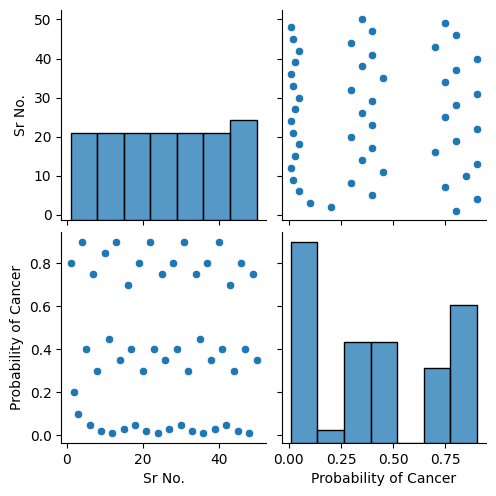

In [8]:
sns.pairplot(data)
plt.show()

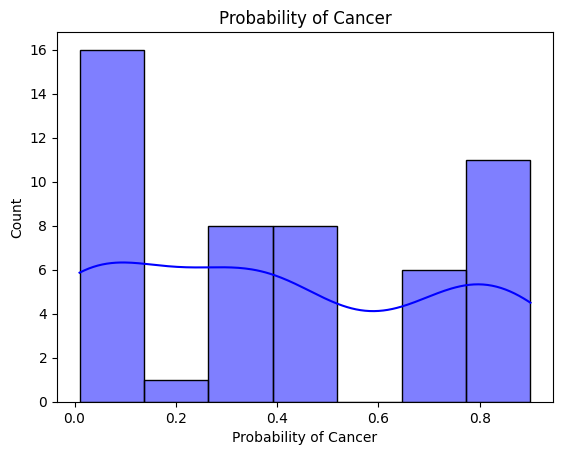

In [9]:
# Probability of Cancer
sns.histplot(data = data, x = 'Probability of Cancer', kde = True, color = 'blue')
plt.title('Probability of Cancer')
plt.show()

In [10]:
# Distribution of Smoking Habit
smoking_habit = data['Smoking Habit'].value_counts().reset_index()
smoking_habit.columns = ['Smoking Habit','Count']
fig = px.bar(smoking_habit, x = 'Smoking Habit', y = 'Count', text_auto = True, color = 'Smoking Habit', title = 'Smoking Habit')
fig.show()

In [11]:
# Distibution of Drinking Habit
fig = px.pie(data, names = 'Drinking Habit', hole = 0.3, title = 'Drinking Habit')
fig.show()

In [12]:
# Distribution of Biking Habit
biking_habit = data['Biking Habit'].value_counts().reset_index()
biking_habit.columns = ['Biking Habit','Count']
fig = px.bar(biking_habit, y = 'Biking Habit', color = 'Biking Habit', title = 'Distribution of Biking Habit')
fig.show()

In [13]:
# Distribution of Walking Habit
fig = px.pie(data, names = 'Walking Habit', title = 'Walking Habit')
fig.show()

In [14]:
# Distribution of Jogging Habit
jogging_habit = data['Jogging Habit'].value_counts().reset_index()
jogging_habit.columns = ['Jogging Habit','Count']
fig = px.bar(jogging_habit, x = 'Jogging Habit', y = 'Count', color = 'Jogging Habit', title = 'Jogging Habit')
fig.show()

In [15]:
# Smoking vs Probability of Cancer
fig = px.bar(data, x = 'Smoking Habit', y = 'Probability of Cancer', title = 'Smoking Habit vs Probability of Cancer', color = 'Smoking Habit')
fig.show()

In [16]:
# Drinking vs Probability of Cancer
fig = px.bar(data, x = 'Drinking Habit', y = 'Probability of Cancer', title = 'Drinking Habit vs Probability of Cancer', color = 'Drinking Habit')
fig.show()

In [17]:
# Probability of Cancer based on Biking Habit
fig = px.box(data, x = 'Biking Habit', y = 'Probability of Cancer', title = 'Probability of Cancer based on Biking Habit', color='Biking Habit')
fig.show()

In [18]:
# visualize interactions between Walking Habit and Probability of Cancer
fig = px.scatter(data, x = 'Walking Habit', y = 'Probability of Cancer', title = 'Walking Habit vs Probability of Cancer', color = 'Walking Habit')
fig.show()

In [19]:
# Combined Subplots for Biking, Walking, and Jogging Habit
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ("Biking Habit", "Walking Habit", "Jogging Habit"))

fig.add_trace(go.Bar(x = data['Biking Habit'], y = data['Probability of Cancer'], name = "Biking"), row=1, col=1)

fig.add_trace(go.Bar(x = data['Walking Habit'], y = data['Probability of Cancer'], name = "Walking"), row=1, col=2)

fig.add_trace(go.Bar(x = data['Jogging Habit'], y = data['Probability of Cancer'], name="Jogging"), row=1, col=3)

fig.update_layout(title_text = "Comparison of Physical Activities and Probability of Cancer", showlegend = False)
fig.show()

In [20]:
# Correlation Heatmap (for numerical relationships)
corr_matrix = data[['Sr No.', 'Probability of Cancer']].corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.columns, colorscale='Viridis'))
fig.update_layout(title='Correlation Heatmap')
fig.show()

# **Predictive Modeling**

In [21]:
# Defining features and target variable
x = data[['Smoking Habit','Drinking Habit','Biking Habit','Walking Habit','Jogging Habit']]
y = data['Probability of Cancer']

In [22]:
# One-hot encoding for categorical variables
categorical_features = ['Smoking Habit', 'Drinking Habit', 'Biking Habit', 'Walking Habit', 'Jogging Habit']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)])

In [23]:
# Split the datasets into Training and Testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# Creating a pipeline for transforming the data and applying Linear Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])

In [25]:
# Train the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Smoking Habit',
                                                   'Drinking Habit',
                                                   'Biking Habit',
                                                   'Walking Habit',
                                                   'Jogging Habit'])])),
                ('regressor', LinearRegression())])

In [26]:
# predictions on the test set
y_pred = pipeline.predict(x_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.0030
R-squared: 0.9743
